In [43]:
import matplotlib.pyplot as plt
import pandas as pd
#plt.rcParams["figure.figsize"] = (10,7)

alphas = [-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20]
fs = 15
legend_fs = 11

folder = 'prova/'

In [55]:
#c3ddata = pd.read_csv(folder + 'cart-data3d_noi.csv')
hc3ddata = pd.read_csv(folder + 'cart-data3d_houska.csv')
#rc3ddata = pd.read_csv(folder + 'cart-data3d_rail.csv')
#wc3ddata = pd.read_csv(folder + 'cart-data3d_williams.csv')

c3ddata['V_rel_block'] = c3ddata.apply(lambda row: row.V_block_finx - row.Wind_x, axis=1)
hc3ddata['V_rel_blockx'] = hc3ddata.apply(lambda row: row.V_block_finx - row.Wind_x, axis=1)

time = c3ddata['TotTime'].max()

hc3ddata.tail(4)

,Iter,TotTime,m_block,Alpha,mu,Theta0,Theta_fin,V_theta_fin,V_block_finx,V_block_finy,...,Tension,Lift,Liftx,Lifty,Liftz,Drag,Dragx,Dragy,Dragz,V_rel_blockx
296,19598,1.96,40.0,20.0,0.0,1.57,1.57,0.0,0.0,0.0,...,172.53,168.89,167.40,0.0,-22.43,33.78,4.49,0.0,33.48,-33.0
297,19885,1.99,40.0,20.0,0.0,1.57,1.57,0.0,0.0,0.0,...,171.36,167.73,166.26,0.0,-22.17,33.55,4.43,0.0,33.25,-35.0
298,20189,2.02,40.0,20.0,0.0,1.57,1.57,0.0,0.0,0.0,...,170.28,166.66,165.21,0.0,-21.94,33.33,4.39,0.0,33.04,-37.0
299,20507,2.05,40.0,20.0,0.0,1.57,1.57,0.0,0.0,0.0,...,169.27,165.65,164.22,0.0,-21.73,33.13,4.35,0.0,32.84,-39.0


In [28]:
c3ddata.Alpha.unique()

array([-8., -6., -4., -2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.,
       18., 20.])

## 1) Block velocities as a function of the attack angle for various wind velocities

In [29]:
wmin = 3
wmax = 41
step = 2

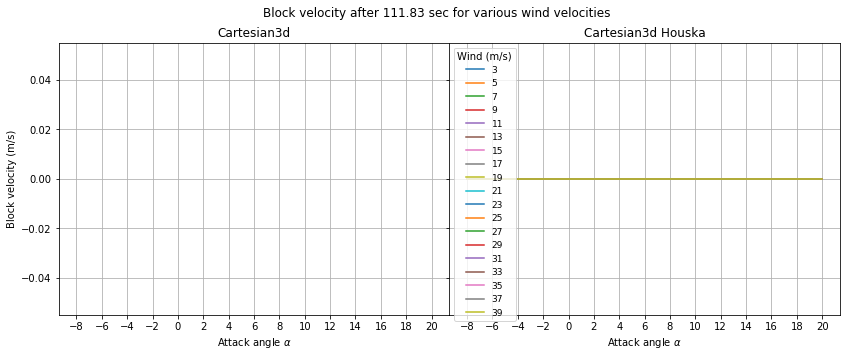

In [56]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 5), gridspec_kw={'wspace': 0})

for w in range(wmin, wmax, step): 
    #print(float(w))
    fig.suptitle("Block velocity after " + str(time) + " sec for various wind velocities")
    
    #wdf = c3ddata.loc[c3ddata['Wind_x'] == float(w)]
    #print(wdf.head(5))
    #axs[0].plot(wdf['Alpha'], wdf['V_block_finx'], label=str(w))
    #plt.grid(b=True)
    
    wdf = hc3ddata.loc[hc3ddata['Wind_x'] == float(w)]
    wdf.head(2)
    axs[1].plot(wdf['Alpha'], wdf['V_block_finx'], label=str(w))
    axs[0].grid(b=True)
    axs[1].grid(b=True)
    
    axs[1].legend(title = r'Wind (m/s)', fontsize = legend_fs, loc='upper left', prop={"size":9})
    axs[0].set_ylabel('Block velocity (m/s)')
    #axs[0].set_xlim(0,20)
    
    axs[0].set_title("Cartesian3d")
    axs[1].set_title("Cartesian3d Houska")
    
for ax in axs.flat:
    ax.set(xlabel='Attack angle ' + r'$\alpha$')
    ax.set_xticks(alphas)
    
#plt.savefig('Images/3d-comparison/3d-vblock-alpha-pi4-mu0.png')

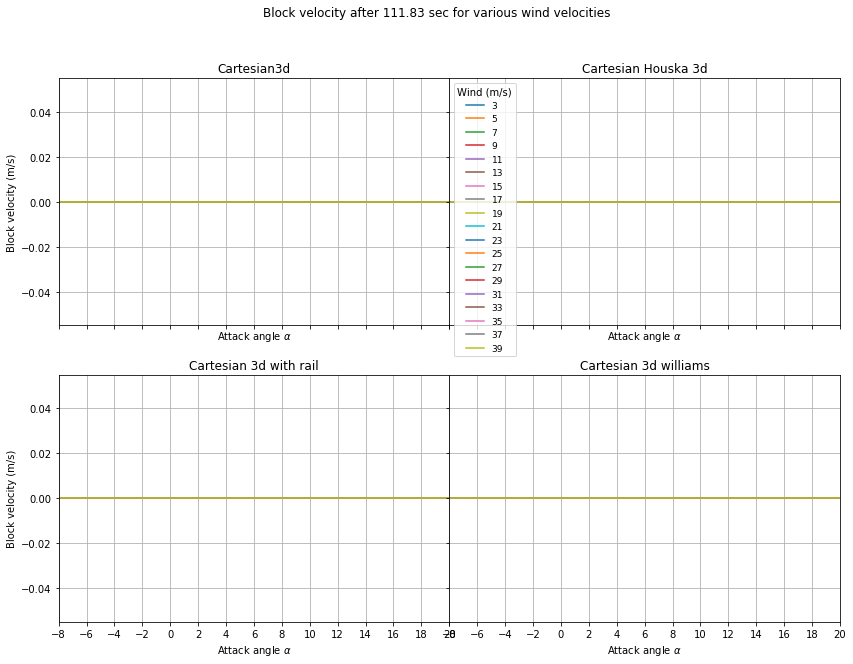

In [15]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(14, 10), gridspec_kw={'wspace':0, 'hspace':0.2})

for w in range(wmin, wmax, step): 
    fig.suptitle("Block velocity after " + str(time) + " sec for various wind velocities")
    
    wdf = c3ddata.loc[c3ddata['Wind_x'] == float(w)]
    axs[0,0].plot(wdf['Alpha'], wdf['V_block_finx'], label=str(w))
    axs[0,0].grid(b=True)
    axs[0,0].set_title("Cartesian3d")
    axs[0,0].set_xlim(0,20)
    
    wdf = hc3ddata.loc[hc3ddata['Wind_x'] == float(w)]
    axs[0,1].plot(wdf['Alpha'], wdf['V_block_finx'], label=str(w))
    axs[0,1].grid(b=True)
    axs[0,1].set_title("Cartesian Houska 3d")
    
    wdf = rc3ddata.loc[rc3ddata['Wind_x'] == float(w)]
    axs[1,0].plot(wdf['Alpha'], wdf['V_block_finx'], label=str(w))
    axs[1,0].grid(b=True)
    axs[1,0].set_title("Cartesian 3d with rail")
    
    wdf = wc3ddata.loc[wc3ddata['Wind_x'] == float(w)]
    axs[1,1].plot(wdf['Alpha'], wdf['V_block_finx'], label=str(w))
    axs[1,1].grid(b=True)
    axs[1,1].set_title("Cartesian 3d williams")
    
    axs[0,1].legend(title = r'Wind (m/s)', fontsize = legend_fs, loc='upper left', prop={"size":9})
    
    axs[0,0].set_ylabel('Block velocity (m/s)')
    axs[1,0].set_ylabel('Block velocity (m/s)')
    
for ax in axs.flat:
    ax.set(xlabel='Attack angle ' + r'$\alpha$')
    ax.set_xticks(alphas)

## 2) Kite relative velocity as a function of wind velocities for various alpha

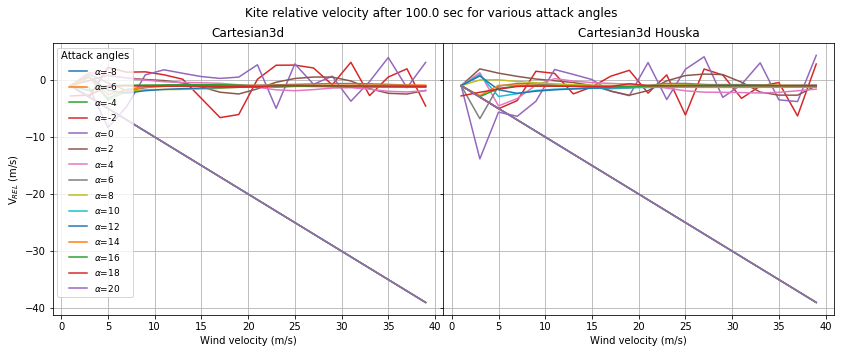

In [54]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 5), gridspec_kw={'wspace': 0})

for i, angle in enumerate(alphas): 
    
        fig.suptitle("Kite relative velocity after " + str(time) + " sec for various attack angles")

        wdfc = c3ddata.loc[c3ddata['Alpha'] == angle]
        axs[0].plot(wdfc['Wind_x'], wdfc['Vrelx'], label=r'$\alpha$='+str(angle))
        plt.grid(b=True)

        wdfs = hc3ddata.loc[hc3ddata['Alpha'] == angle]
        axs[1].plot(wdfs['Wind_x'], wdfs['Vrelx'], label=r'$\alpha$='+str(angle))
        axs[0].grid(b=True)

        axs[0].legend(title = r'Attack angles', fontsize = legend_fs, loc='upper left', prop={"size":9})
        axs[0].set_ylabel(r'V$_{REL}$ (m/s)')

        axs[0].set_title("Cartesian3d")
        axs[1].set_title("Cartesian3d Houska")
    
for ax in axs.flat:
    ax.set(xlabel='Wind velocity (m/s)')
    
#plt.savefig('Images/3d-comparison/3d-vrel-wind-pi4-mu0.png')

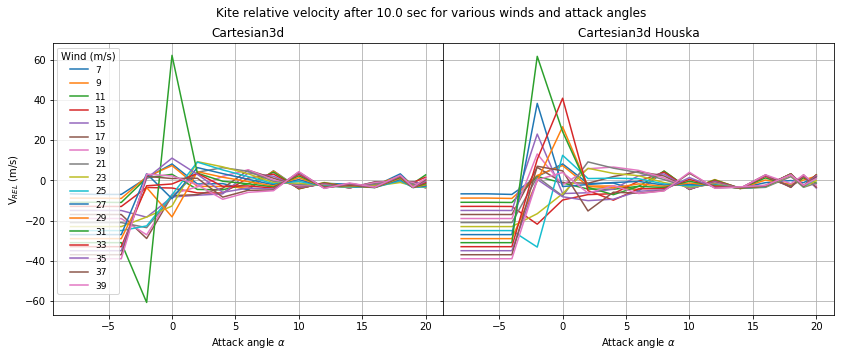

In [47]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 5), gridspec_kw={'wspace': 0})

for w in range(wmin, wmax, step): 
    
    fig.suptitle("Kite relative velocity after " + str(time) + " sec for various winds and attack angles")
    
    wdfc = c3ddata.loc[c3ddata['Wind_x'] == float(w)]
    axs[0].plot(wdfc['Alpha'], wdfc['Vrelx'], label=str(w))
    plt.grid(b=True)
    
    wdfs = hc3ddata.loc[hc3ddata['Wind_x'] == float(w)]
    axs[1].plot(wdfs['Alpha'], wdfs['Vrelx'], label=str(w))
    axs[0].grid(b=True)
    
    axs[0].legend(title = r'Wind (m/s)', fontsize = legend_fs, loc='upper left', prop={"size":9})
    axs[0].set_ylabel(r'V$_{REL}$ (m/s)')
    
    axs[0].set_title("Cartesian3d")
    axs[1].set_title("Cartesian3d Houska")
    
for ax in axs.flat:
    ax.set(xlabel='Attack angle ' + r'$\alpha$')
    
#plt.savefig('Images/3d-comparison/3d-vrel-alpha-pi4-mu0.png')